### Laboratorio 1
---  

Universidad Galileo  
Instituto de Investigación de Operaciones  
Maestría en Data Science  
Statistical Learning 1, sección U  
Segundo ciclo 2023

**Sergio Josué Castillo Custodio, Carnet 202300331**

#### Regresión Lineal Simple
---
##### Acerca de este Lab

Aprenderemos cómo utilizar la librería scikit-learn para implementar regresión lineal simple. Descargaremos un set de datos relacionado al consumo de combustible y a la emisión del dióxido de Carbono en autos, para continuar con lo visto en clase. Utilizaremos las técnicas vistas para separaremos nuestros datos en un dataset de training y en otro set de testing, crearemos un modelo utilizando el training set, se evaluará utilizando el testing set para finalmente usar el modelo para predecir valores desconocidos.

#### Importando paquetes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Descargando los Datos

Para descargar los datos, se puede utilizar wget o copiar y pegar el contenido del siguiente link en un archivo FuelConsumption.csv. [Dataset link](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv "Fuel Consumption Co2.csv")

#### Trabajando con el dataset

**FuelConsumption.csv:**

Hemos descargado el dataset de consumo de combustible, FuelConsumption.csv, el cual contiene ratings específicos al consumo de combustible y emisiones de dióxido de carbono para aquellos vehículos ligeros en la venta minorista dentro de Canadá. [Dataset source](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv "Fuel Consumption Co2.csv")

* MODELYEAR e.g. 2014
* MAKE e.g. Acura
* MODEL e.g. ILX
* VEHICLE CLASS e.g. SUV
* ENGINE SIZE e.g. 4.7
* CYLINDERS e.g 6
* TRANSMISSION e.g. A6
* FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
* FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
* FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
* CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

#### Importando datos

In [4]:
df=pd.read_csv('/Users/sergiocastillo/Documents/Academics/Master/Data Science/Courseware/4 Statistical Learning 1/Tareas/1/Lab1-FuelConsumptionCo2.csv')
# un vistazo dentro del set de datos
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Exploración de datos

Tengamos primero una exploración descriptiva de nuestros datos.

In [5]:
# Sumarizar los datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Seleccionemos algunas características para explorar más en detalle.

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


podemos dibujar cada una de estas características:

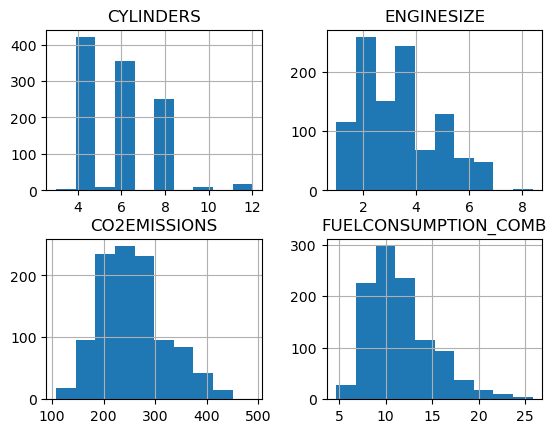

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Ahora, comparemos estas características anteriores con la emisión de carbono, para ver cuán lineal es la regresión:

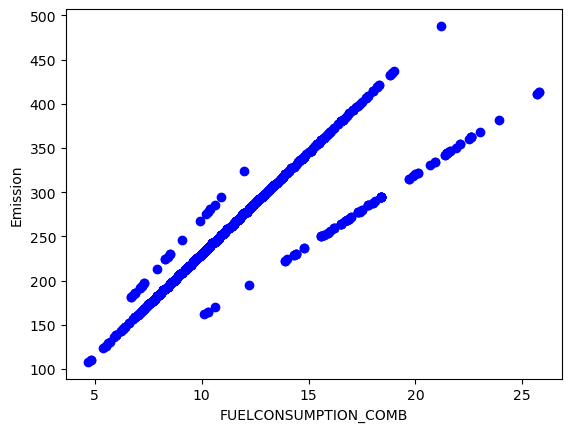

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

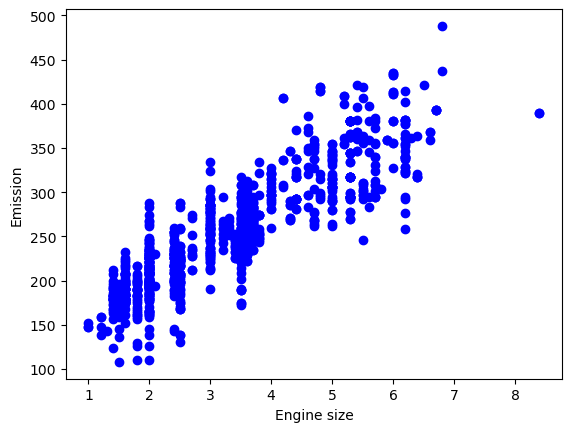

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Práctica

dibuja CYLINDER vs la Emisión, para ver cuán lineal es su relación:

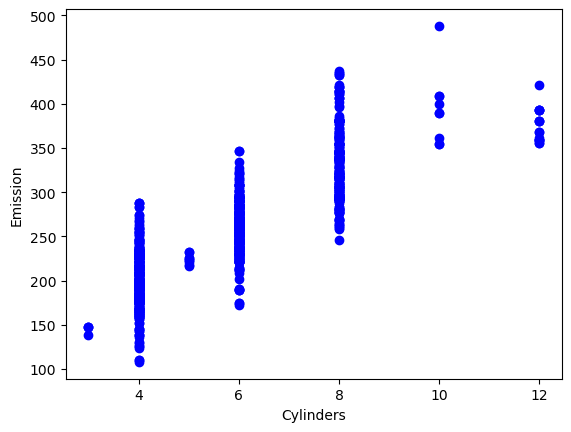

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### Creando el set de datos de entrenamiento y de prueba

Train/Test Split divide el dataseet en un set de training y otro de testing, siendo excluyentes. Después de ello, entrenamos con el set de training y pruebas con el de testing.

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Modelo de Regresión Simple

La Regresión Lineal cuadra con un modelo lineal de coeficientes B = (B1, …, Bn) para minimizar la ‘suma residual de cuadrados’ entre la x independiente del dataset y la dependiente y por la aproximación lineal.

##### Entrenar distribución de los datos

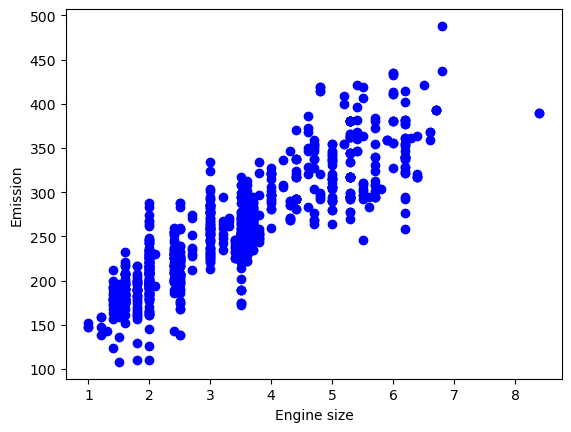

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling

Usando el paquete sklearn para modelar datos.

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print(f'El polinomio del modelo es: {regr.coef_[0,0]}x1 + {regr.intercept_[0]}.')

Coefficients:  [[38.54207187]]
Intercept:  [126.98152177]
El polinomio del modelo es: 38.54207186720035x1 + 126.98152176828472.


#### Trazar las salidas

podemos marcar la recta de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

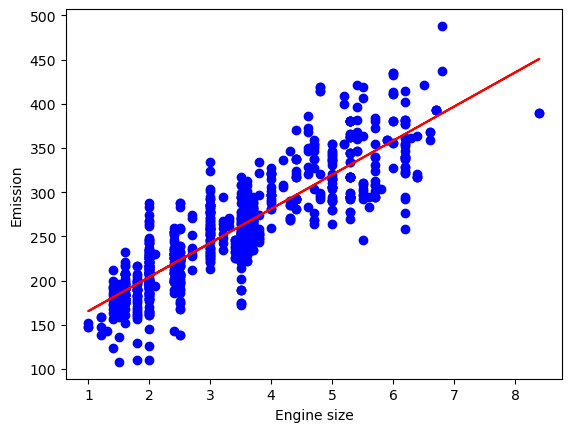

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluación

comparamos los valores actuales y predichos para calcular la exactitud del modelo de regresión. Las métricas de la evaluación proveen un role principal en el desarrollo de un modelo, ya que provee conocimiento profundo en áreas que necesitan mejoras.

Existen distintas métricas de evaluación de modelos, utilicemos MSE para calcular la exactitud de nuestro modelo basado en el set de prueba:
- Error absoluto de media: Es una media del valor absoluto de los errores. Es la métrica más fácil de comprender ya que simplemente es el promedio de los errores.
- Error Cuadrado Medio (MSE): El Error Cuadrado Medio (MSE) es la media del error cuadrático. Es más popular que el error de Media absoluto porque hace foco en grandes errores. Esto se debe a que el término cuadrático tiene errores más grandes que van creciendo en comparación con más pequeños.
- Error Cuadrático Medio (RMSE).
- R-cuadrática no es un error, sino que es una medida popular para darle precisión a nuestro modelo. Representa cuán cerca están los datos de la linea de regresión ajustada. Mientras más alto el R-cuadrático, mejor se encontrará ajustado el modelo respecto de los datos. El puntaje mejor posible es 1.0.

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 23.19
Suma residual de los cuadrados (MSE): 977.01
R2-score: 0.61


### Entregables

1. Resultados de la ejecución de los comandos.  
Las celdas de código se ejecutaron. Sus resultados se muestran debajo de cada celda.

2. Polinomio generado por el modelo de regresión.  
El polinomio para el modelo lineal univariable se muestra en la sección de *Modeling*.

3. Análisis de la precisión del modelo.  
La precisión del modelo se analiza en la sección de *Evaluación*.

#### Reto

1. Utilice el algoritmo K-fold cross validation e indique el polinomio que tenga mejor precisión.
2. Analice las variables e implemente un modelo de regresión múltiple que mejore la predicción del modelo.
3. Cuales son las variables poco significativas en el diseño del modelo?

Como primer paso se desarrollará un modelo de regresión lineal multivariable con las variables CYLINDERS, ENGINESIZE, FUELCONSUMPTION_COMB para estimar CO2EMISSIONS.

Seguidamente se utilizará el algoritmo K-fold para realizar la validación cruzada. Por último se analizan cuales son las variables poco significativas.

##### Modelo lineal multi-variable

In [38]:
train_x=np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
# The coefficients
print('coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)
print(f'Los coeficientes promedio son: {regr.coef_[0,0]}x1 + {regr.coef_[0,1]}x2 + {regr.coef_[0,2]}x3 + {regr.intercept_[0]}.')

coefficients:  [[11.52738302  7.50218164  9.04967771]]
intercept:  [68.87193683]
Los coeficientes promedio son: 11.527383023748174x1 + 7.50218164205706x2 + 9.049677710227494x3 + 68.8719368328793.


**Análisis de la precisión del modelo.**

Para evaluar la precisión se analizará el dataset de testing y se calcularán el error medio absoluto, MSE y R2-score.

In [39]:
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 16.18
Suma residual de los cuadrados (MSE): 471.05
R2-score: 0.83


De las métricas resultantes del análisis del dataset de testing encontramos que el modelo lineal multi-variable es más eficiente que el modelo uni-variable desarrollado anteriormente. Sus errores, tanto el medio absoluto como el MSE, son más bajos y el R2-score es más alto.

#### Validación Cruzada K-folds del modelo

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# Definiendo variables independientes y dependientes
X = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']].astype(float)
y = cdf['CO2EMISSIONS'].astype(float)

# Definiendo parámetros de validación cruzada K-fold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Seleccionando métricas deseadas de la validación cruzada K-fold
scores=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# Seleccionando modelo de regresión lineal
model = linear_model.LinearRegression()

# Utilizando validación cruzada K-fold para evaluar el modelo
results = cross_validate(model, X, y, scoring=scores, cv=cv, return_estimator=True)

# Obteniendo coeficientes promedio
coefs=pd.DataFrame(columns=['c1','c2','c3','i'])
for model in results['estimator']:
    estimatorv=np.append(model.coef_, model.intercept_)
    coefs=pd.concat([coefs,pd.DataFrame(estimatorv.reshape(1,-1), columns=list(coefs))], ignore_index=True)

# Coeficientes promedio
print(f'Los coeficientes promedio son: β1={coefs.c1.mean()}, β2={coefs.c2.mean()}, β3={coefs.c3.mean()}, β0={coefs.i.mean()}.')

# Resultados de validación cruzada K-folds
results

Los coeficientes promedio son: β1=10.883001588605168, β2=7.487643256021679, β3=9.60143378789181, β0=65.2349463956238.


{'fit_time': array([0.00271988, 0.00126004, 0.00150609, 0.00152206, 0.00148296]),
 'score_time': array([0.00100803, 0.00102901, 0.00092912, 0.00076318, 0.00071287]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_r2': array([0.86533558, 0.86744343, 0.87903719, 0.85864419, 0.82908517]),
 'test_neg_mean_absolute_error': array([-16.646828  , -17.08711891, -16.76041225, -17.23949957,
        -17.35090561]),
 'test_neg_root_mean_squared_error': array([-23.37218731, -23.93241203, -22.718575  , -23.44800902,
        -24.20047027])}

Observando los valores de los errores medios absolutos y MSE, encontramos que el modelo más preciso es el último. El poliniomio de este módelo es:

In [32]:
print(f'Los coeficientes del polinomio más preciso son: β1={coefs.c1[4]}, β2={coefs.c2[4]}, β3={coefs.c3[4]}, β0={coefs.i[4]}.')
print(f'El polinomio es: {coefs.c1[4]}x1 + {coefs.c2[4]}x2 + {coefs.c3[4]}x3 + {coefs.i[4]}')

Los coeficientes del polinomio más preciso son: β1=11.215657083214953, β2=7.539601893668905, β3=9.57847017969314, β0=64.71535894669174.
El polinomio es: 11.215657083214953x1 + 7.539601893668905x2 + 9.57847017969314x3 + 64.71535894669174


Para analizar la relevancia de las variables en el módelo se tomará el modelo lineal uni-variable que ya se desarrolló.

Seguidamente se le agregará cada una de las demás variables para convertirlo en bi-variable y evaluar su efecto.

**Analizando efecto de la variable CYLINDERS**

In [33]:
train_x=np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
# The coefficients
print('coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)
print(f'Los coeficientes promedio son: {regr.coef_[0,0]}x1 + {regr.coef_[0,1]}x2 + {regr.intercept_[0]}.')

coefficients:  [[28.03951932  8.81218992]]
intercept:  [111.06688408]
Los coeficientes promedio son: 28.039519321289088x1 + 8.812189918620277x2 + 111.06688408226603.


*Evaluando modelo*

In [34]:
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 23.36
Suma residual de los cuadrados (MSE): 941.59
R2-score: 0.62


**CONCLUSIÓN**

Comparando las métricas de evaluación de ambos modelos desarrollados encontramos que casi no hay mejora en ninguno de ellos para con el módelo bi-variable, tal y como se muestra a continuación:

|Modelo|Variables independientes|Variable dependiente|Error medio absoluto|MSE|R2-score|
|---|---|---|---|---|---|
|Uni-variable|ENGINESIZE|CO2EMISSIONS|23.19|977.01|0.61|
|Bi-variable|ENGINESIZE, CYLINDERS|CO2EMISSIONS|23.36|946.59|0.62|

*Se concluye que la variable **CYLINDERS no es relevante para el modelo**.*

**Analizando efecto de la variable FUELCONSUMPTION_COMB**

In [35]:
train_x=np.asanyarray(train[['ENGINESIZE', 'FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
# The coefficients
print('coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)
print(f'Los coeficientes promedio son: {regr.coef_[0,0]}x1 + {regr.coef_[0,1]}x2 + {regr.intercept_[0]}.')

coefficients:  [[20.24029449  9.16401436]]
intercept:  [81.85772995]
Los coeficientes promedio son: 20.240294491434756x1 + 9.16401436115294x2 + 81.85772995101505.


*Evaluando modelo*

In [36]:
test_x = np.asanyarray(test[['ENGINESIZE', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 15.97
Suma residual de los cuadrados (MSE): 486.65
R2-score: 0.83


**CONCLUSIÓN**

Comparando las métricas de evaluación de ambos modelos desarrollados encontramos que todos ellos mejoran para con el módelo bi-variable, tal y como se muestra a continuación:

|Modelo|Variables independientes|Variable dependiente|Error medio absoluto|MSE|R2-score|
|---|---|---|---|---|---|
|Uni-variable|ENGINESIZE|CO2EMISSIONS|23.19|977.01|0.61|
|Bi-variable|ENGINESIZE, FUELCONSUMPTION_COMB|CO2EMISSIONS|15.97|486.65|0.83|

*Se concluye que la variable **FUELCONSUMPTION_COMB es relevante para el modelo**.*

#### Comentarios finales

Al comparar el modelo uni-variable con los dos modelos bi-variables recién desarrollados, encontramos que la variable poco significativa para el módelo es CYLINDERS. Las otras dos tienen un mayor efecto, lo cual se ve reflejado en las métricas de precisión de los modelos.